<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week13%20-%20Clustering/Exercises/Clustering_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1: clustering

In this exercise we are going to work on the TelCo dataset. 


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

sns.set(style="darkgrid") #dark
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Sklearn import
from sklearn.cluster import KMeans #K-means Clustering
from sklearn.cluster import AgglomerativeClustering # Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler # Normalization


### Load the data & Preprocessing


In [ ]:
url = "https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/customers_prepro.csv"
telco_df = pd.read_csv(url)
telco_df.drop("Unnamed: 0", axis=1, inplace=True)
telco_df.set_index("customerID", inplace=True)
telco_df_NoChurn = telco_df.drop("Churn", axis=1)
display(telco_df.head())


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
5575-GNVDE,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
3668-QPYBK,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1
7795-CFOCW,1,0,0,0,45,0,0,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


## K-means

Now we will apply different clustering procedure to extract interesting information about the data.  

The **KMeans** algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster **sum-of-squares**. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.  

The **K-means** algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:  


$$ \sum \limits_{i=0}^{n} \min\limits_{\mu_j \in C}(||x_i - \mu_j||^2) $$


K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. In this situation leaving variances unequal is equivalent to putting more weight on variables with smaller variance, so clusters will tend to be separated along variables with greater variance.  

For this reason we should normalize the continuous data.  

**Question 1:**  
Use the minMaxScaler module from sklearn to normalize the continuous-valued data.

**Hint:**  
The continuous-values data are : `tenure`, `MonthlyCharges` and `TotalCharges`.

In [ ]:
#Your code here
scaler = MinMaxScaler()
scaler.fit(telco_df[['tenure', 'MonthlyCharges', 'TotalCharges']])
telco_df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(telco_df[['tenure', 'MonthlyCharges', 'TotalCharges']])
display(telco_df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0.000000,0,0,2,0,1,0,0,0,0,0,1,0,0.115423,0.001275,0
5575-GNVDE,1,0,0,0,0.464789,1,0,2,1,0,1,0,0,0,1,0,1,0.385075,0.215867,0
3668-QPYBK,1,0,0,0,0.014085,1,0,2,1,1,0,0,0,0,0,1,1,0.354229,0.010310,1
7795-CFOCW,1,0,0,0,0.619718,0,0,2,1,0,1,1,0,0,1,0,2,0.239303,0.210241,0
9237-HQITU,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,0,0.521891,0.015330,1


**Question2:**  
Now we want to identify which categorical features are in no direct relationship with the charges. Create a new list that contains all categorical features. Then for each element plot a pairplot. From your result what can you conclude? Identify relevant and irrelevant features.   

**Hint:** 
The paiplot should always show the `MonthlyCharges` and the `TotalCharges`. Use the `hue` argument of `sns.pairplot()` to display the current feature in your graph.

In [ ]:
# Identify discret variables as list
cat_features = telco_df.columns.drop(['tenure', 'MonthlyCharges', 'TotalCharges'])
# Of course, one could also use the code below
# cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
print(cat_features)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], dtype='object')


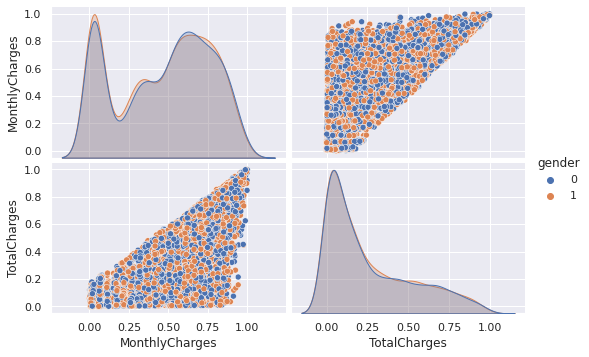

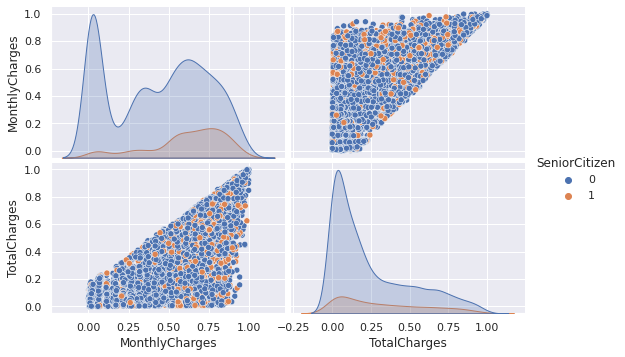

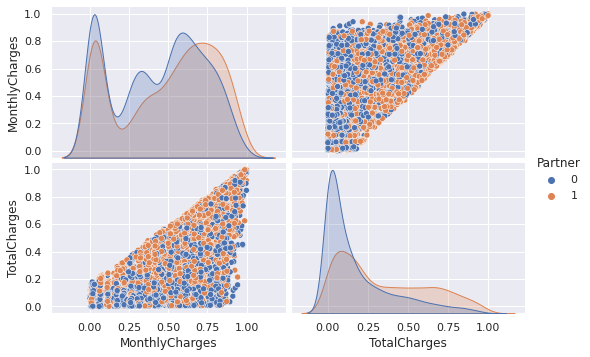

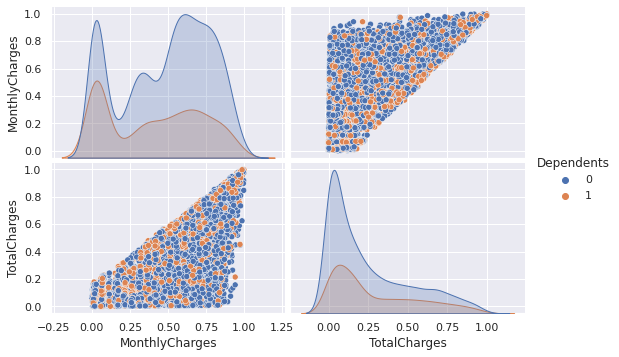

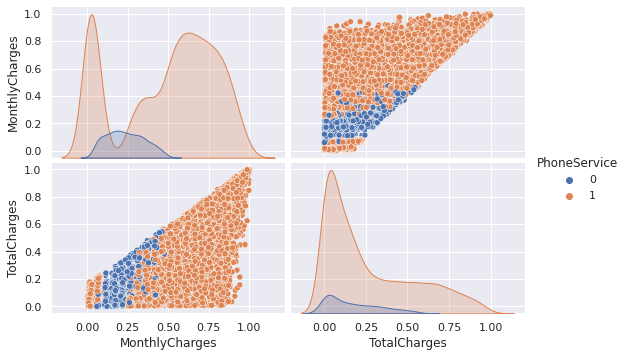

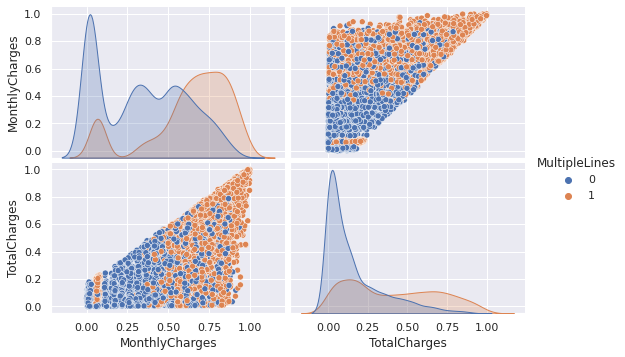

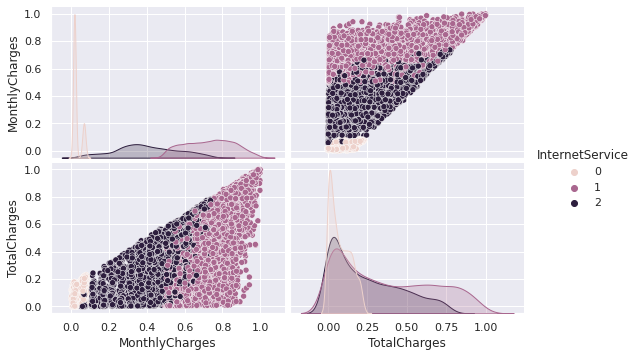

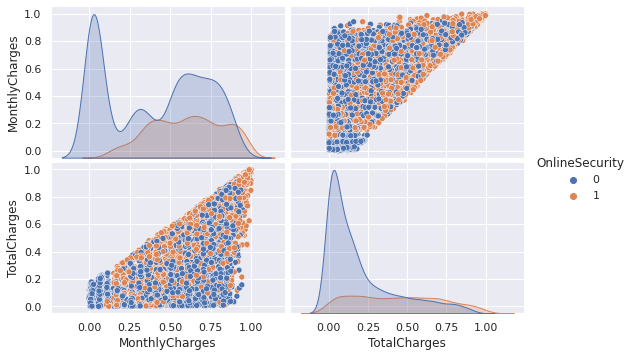

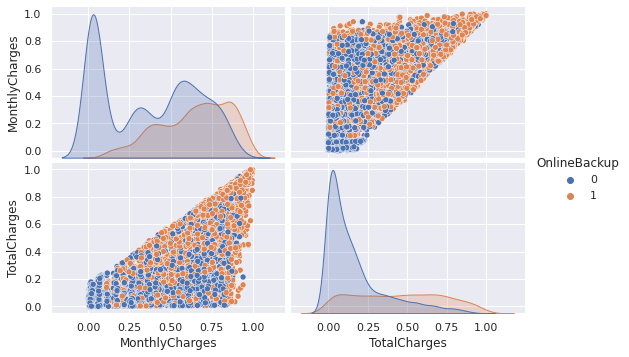

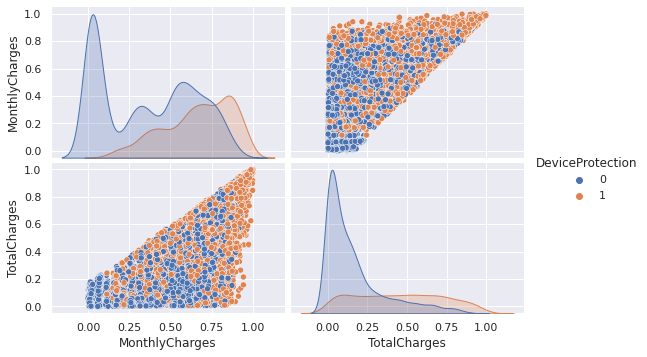

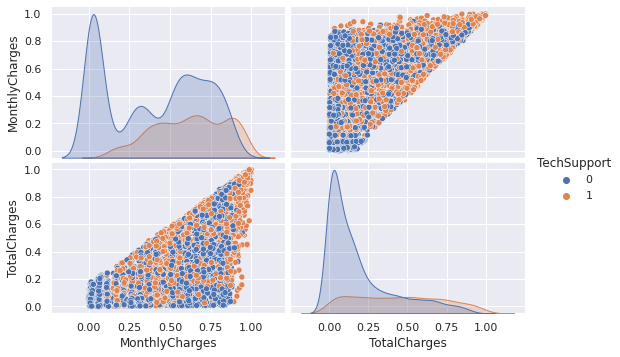

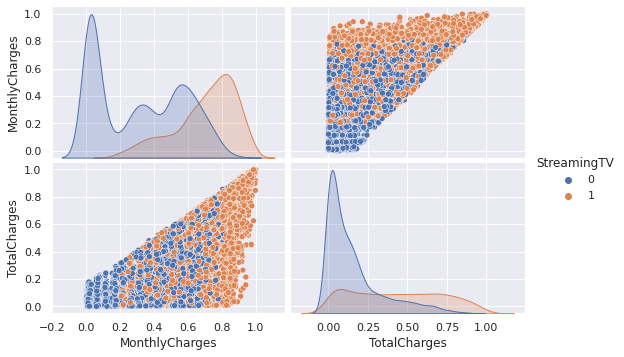

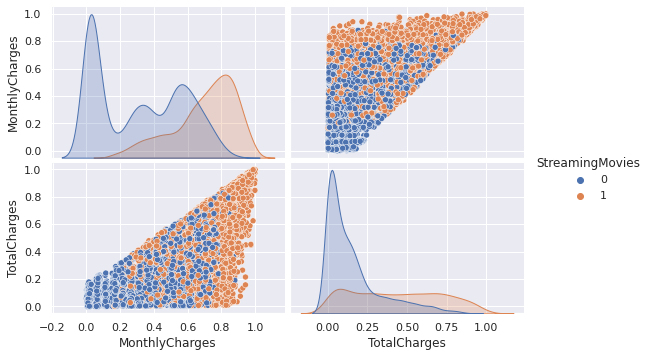

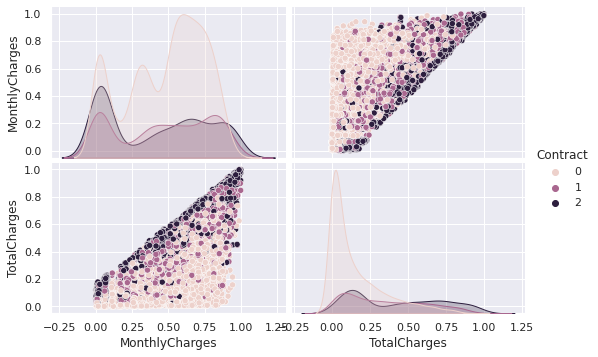

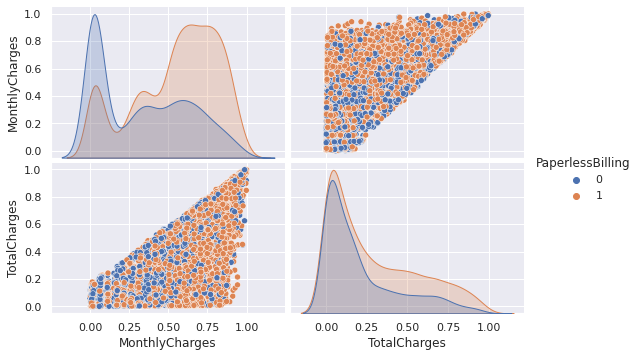

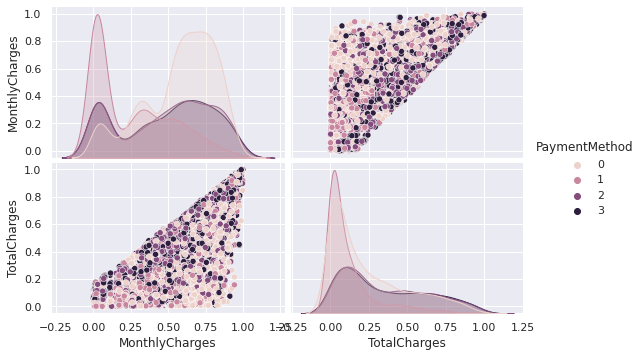

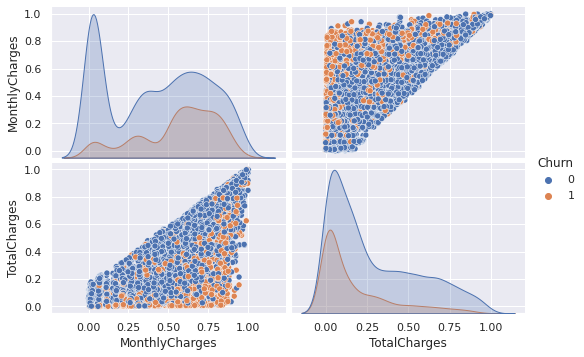

In [ ]:
# Pairplots | this cell will take 1-2 minutes to run
for feature in cat_features:
    sns.pairplot(telco_df, vars=['MonthlyCharges', 'TotalCharges'], hue=feature, aspect=1.5)
    plt.show()


**Question 3:**  
Drop the most irrelevant feature.

**Hint:** The irrelevant features due not tell us anything about the distribution of the `MonthlyCharges` and the `TotalCharges`. Hence, they can be identified by looking at the distribution of the charges (if the feature doesn't change the distribution, it is irrelevant). This means that if the superposed distributions, each representing a state of the feature, are almost perfectly alike, it is irrelevant.

In [ ]:
#Your code here
telco_df = telco_df.drop(columns=['gender'])
display(telco_df.head())

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,0.000000,0,0,2,0,1,0,0,0,0,0,1,0,0.115423,0.001275,0
5575-GNVDE,0,0,0,0.464789,1,0,2,1,0,1,0,0,0,1,0,1,0.385075,0.215867,0
3668-QPYBK,0,0,0,0.014085,1,0,2,1,1,0,0,0,0,0,1,1,0.354229,0.010310,1
7795-CFOCW,0,0,0,0.619718,0,0,2,1,0,1,1,0,0,1,0,2,0.239303,0.210241,0
9237-HQITU,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,0,0.521891,0.015330,1


**Question 4:**  
Now we will to apply the **K-means** algorithm and we want to estimate the number of clusters. We will use the **The Elbow Method** ([doc](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) )).  

The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve (from clustering **inertia**) as the number of clusters to use. The intuition is that increasing the number of clusters will naturally improve the fit (explain more of the variation), since there are more parameters (more clusters) to use, but that at some point this is **over-fitting**, and the elbow reflects this. 

Using the KMeans module from sklearn, iteratively apply the K-means algorithm, save the parameter `inertia_` (i.e sum of squared distances of samples to their closest cluster center). Then plot the inertia relative to the number of clusters. Knowing that the elbow method tells us to select the cluster where there is a significant change in inertia, find the possible elbow point (possible number of cluster).

How many clusters could you use now ?


Text(0, 0.5, 'Inertia')

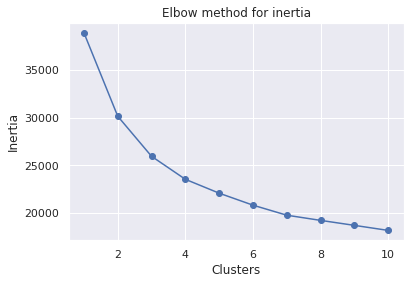

In [ ]:
# Save inertia value
inertias = []
nbr_clusters = range(1,11)

# Iterate over several number of clusters
for i in nbr_clusters:
    km = KMeans(n_clusters=i).fit(telco_df)
    inertias.append(km.inertia_)
    
plt.plot(nbr_clusters, inertias, '-o')
plt.title('Elbow method for inertia')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

**Question 5:**  


Now, we want to cluster only with two features. Select the `MonthlyCharges` over the `tenure` for churned people (`Churn` == 1), then, with the number of cluster find in the previous question, apply the K-means algorithms. Save the labels into a dataframe (`labels_` parameter).  
With a scatterplot display the dataset points according to the corresponding `Labels_`. Finally try to display the centers on your graph (use the `cluster_centers_`parameter of the k-mean model). 


**Hint:**  
- Use the `model.labels_ ` from the KMeans parameters for the `hue`
- The `model.cluster_centers_` parameter returns an numpy array (not a dataframe). Use slicing to access the right column (i.e `centers[:, feature_index]`)

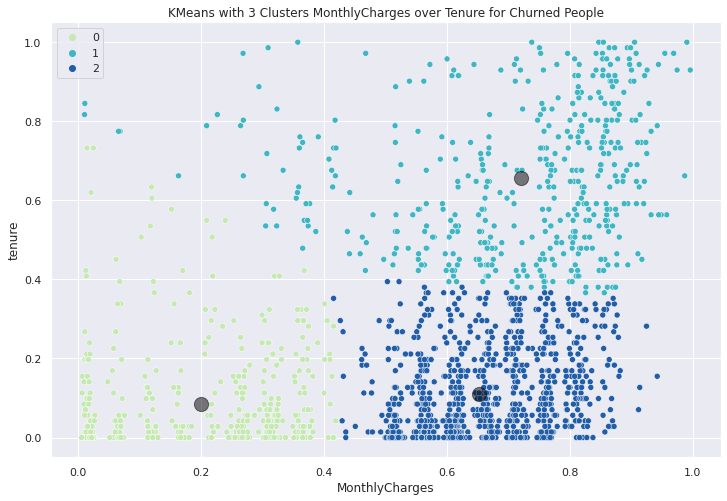

In [ ]:
# Number of clusters
nbr_clusters = 3


#Select the data
temp = telco_df[['MonthlyCharges', 'tenure']].loc[telco_df['Churn'] == 1]

#Fit the model
model = KMeans(n_clusters=nbr_clusters).fit(temp)

plt.figure(figsize=(12, 8))

sns.scatterplot(x=temp['MonthlyCharges'], y=temp['tenure'], hue=model.labels_, palette=sns.color_palette('YlGnBu', n_colors=nbr_clusters))


#Plot cluster centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='Black', s=200, alpha = 0.5)
plt.title('KMeans with 3 Clusters MonthlyCharges over Tenure for Churned People')
plt.show()

**Question 6:**  
Do the same work as in question 5 but on:
-  `MonthlyCharges` over `TotalCharges` for people who have `Contract == 0`.
- `TotalCharges` over `tenure` for churned people 

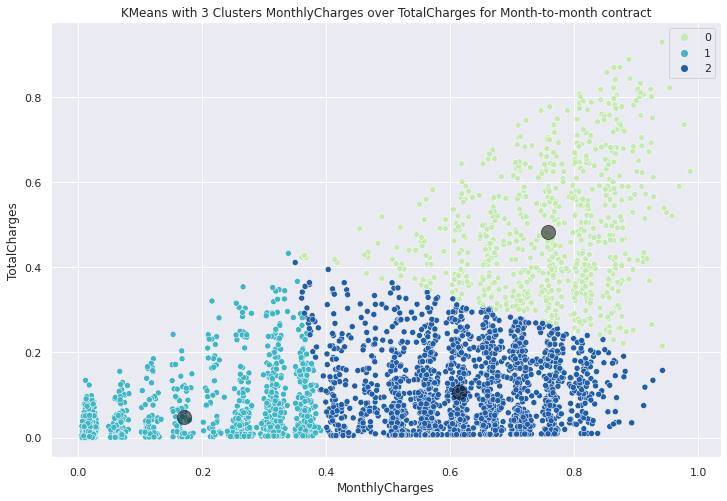

In [ ]:
#Select data
temp = telco_df[['MonthlyCharges', 'TotalCharges']].loc[telco_df['Contract'] == 0]

#Fit the model
model = KMeans(n_clusters=nbr_clusters).fit(temp)

plt.figure(figsize=(12, 8))

sns.scatterplot(x=temp['MonthlyCharges'], y=temp['TotalCharges'], hue=model.labels_, palette=sns.color_palette('YlGnBu', n_colors=nbr_clusters))

#Plot cluster centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha = 0.5)
plt.title('KMeans with 3 Clusters MonthlyCharges over TotalCharges for Month-to-month contract')
plt.show()


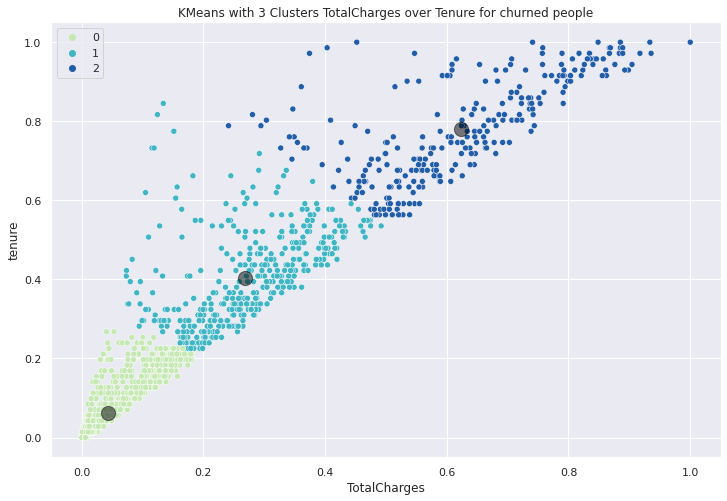

In [ ]:
#Select data
temp = telco_df[['TotalCharges', 'tenure']].loc[telco_df['Churn'] == 1]

#Fit the model
model = KMeans(n_clusters=nbr_clusters).fit(temp)

plt.figure(figsize=(12, 8))

sns.scatterplot(x=temp['TotalCharges'], y=temp['tenure'], hue=model.labels_, palette=sns.color_palette('YlGnBu', n_colors=nbr_clusters))

#Plot cluster centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha = 0.5)
plt.title('KMeans with 3 Clusters TotalCharges over Tenure for churned people')
plt.show()


## hierarchical clustering

In this part we will focus on hierarchical clustering over the TelCo dataset.  

**Question 7:**  
From the `telco_df` dataframe define a variable X which correspond to all columns except `"Churn"`, put the `"Churn"` data into a new dataframe y.
Create 3 dendograms with these linkage method: `['complete', 'average', 'ward']`. What are the differences among these variants ?

In [ ]:
X = telco_df.drop('Churn', axis=1)
y = telco_df['Churn']
display(X.head())
display(y.head())

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,0.000000,0,0,2,0,1,0,0,0,0,0,1,0,0.115423,0.001275
5575-GNVDE,0,0,0,0.464789,1,0,2,1,0,1,0,0,0,1,0,1,0.385075,0.215867
3668-QPYBK,0,0,0,0.014085,1,0,2,1,1,0,0,0,0,0,1,1,0.354229,0.010310
7795-CFOCW,0,0,0,0.619718,0,0,2,1,0,1,1,0,0,1,0,2,0.239303,0.210241
9237-HQITU,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,0,0.521891,0.015330


customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
Name: Churn, dtype: int64

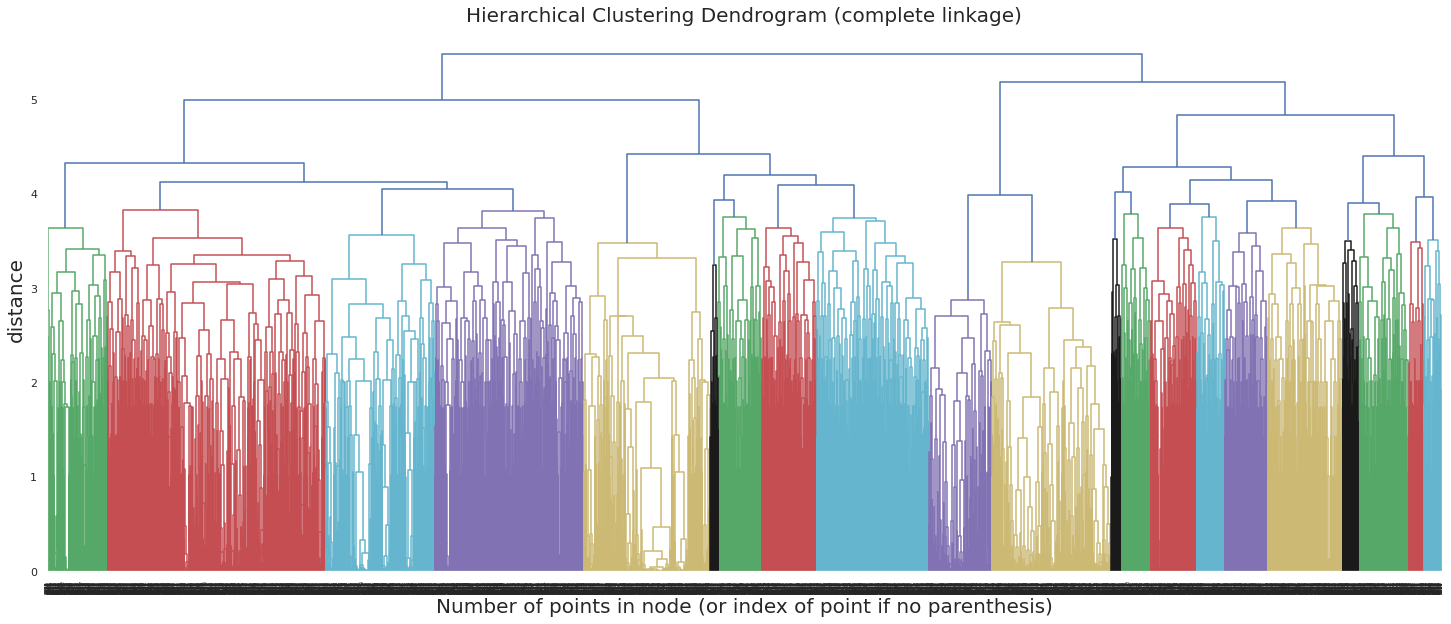

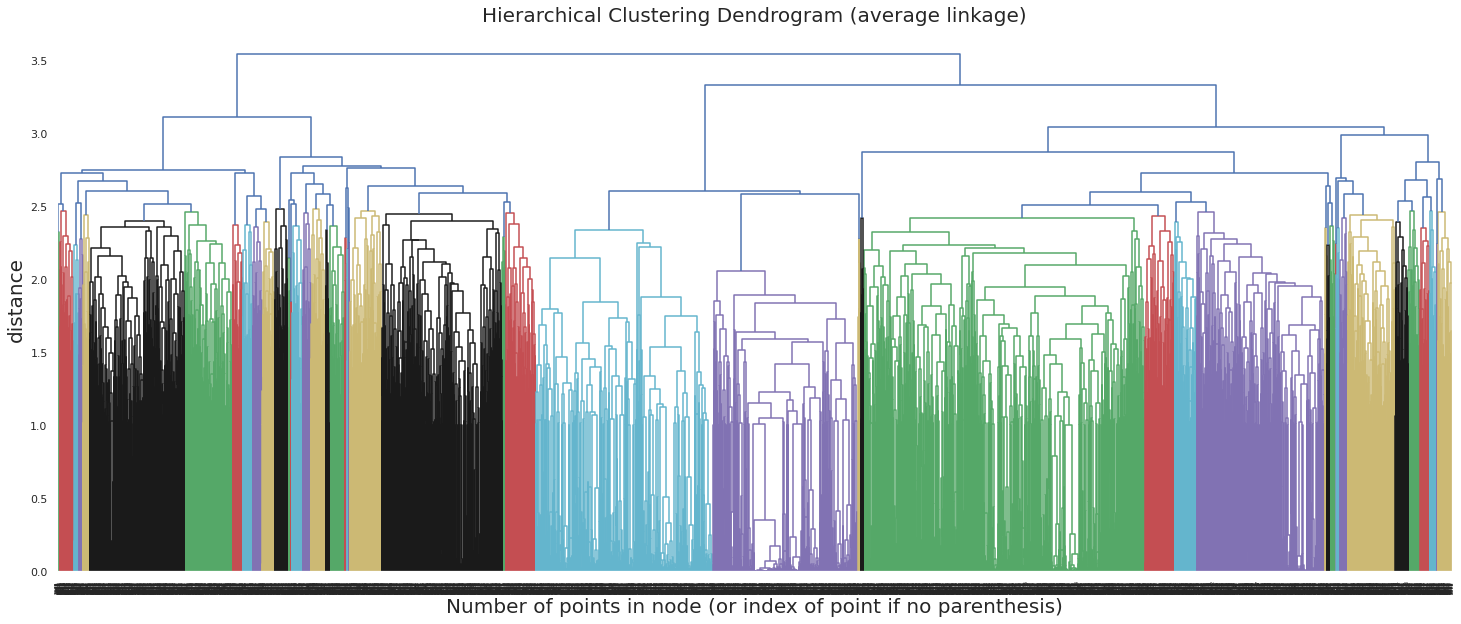

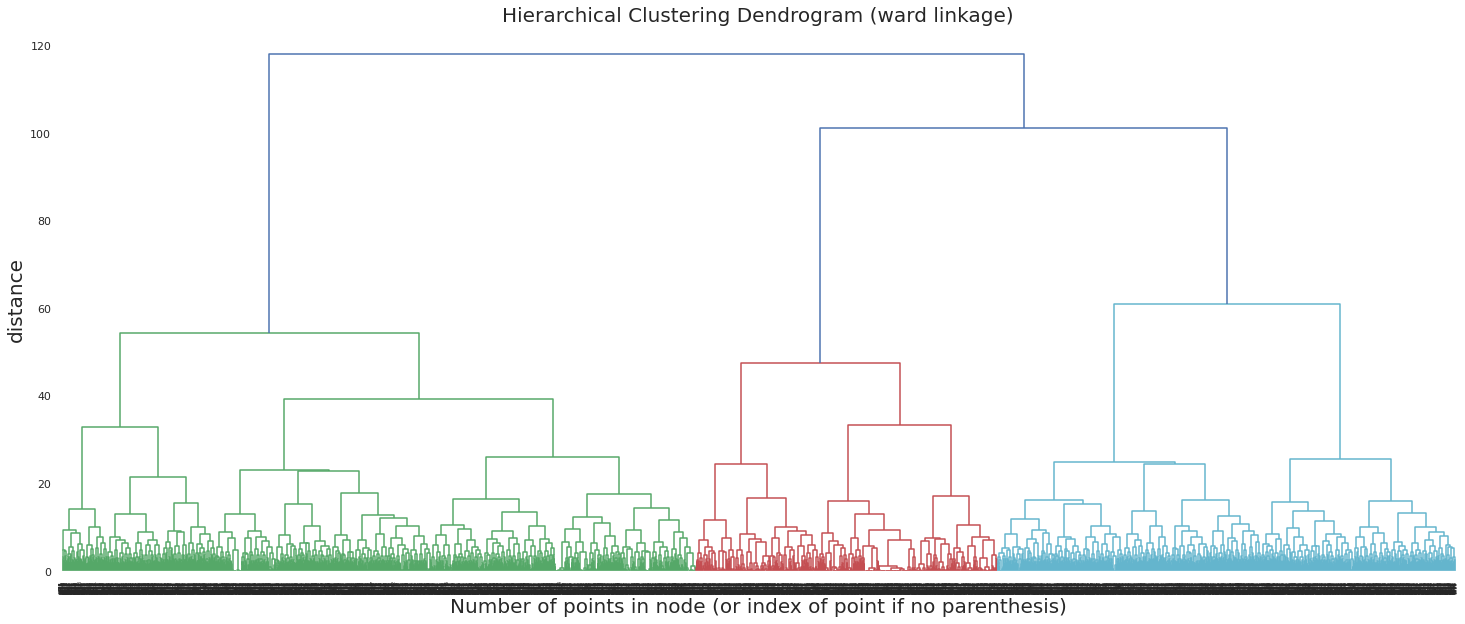

In [ ]:
# It is normal for this cell to take up to 10 minutes to run. You can already look at the next questions during that time.
for method in ['complete', 'average', 'ward']:
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram (' + method + ' linkage)', fontsize=20)
    plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
    plt.ylabel('distance', fontsize=20)
    merg = linkage(X, method)#Provide the type of linkage we wants.
    dendrogram(merg, leaf_rotation = 90)#compute the dendogram according the linkage
    plt.show()

**Question 8:**  
Run an `AgglomerativeClustering` model using `ward` linkage and 3 clusters, then compute the percentage of observations placed in the correct clusters.

In [ ]:
model = AgglomerativeClustering(linkage='ward', n_clusters=3)
cluster = model.fit_predict(X)
sum([1 if x else 0 for x in (model.labels_ == y)])/len(model.labels_)

0.4527872582480091

**Question 9:**  
Compare the computationnal time between K-Mean and hierarchical Clustering using `%%time`. What are the pros and cons of each method?

In [ ]:
%%time
#Kmeans clustering
model = KMeans(n_clusters=3)
model.fit(X)

CPU times: user 226 ms, sys: 201 ms, total: 427 ms
Wall time: 225 ms


In [ ]:
%%time
#hierarchical clustering
model = AgglomerativeClustering(n_clusters = 3)
model.fit(X)

CPU times: user 1.95 s, sys: 72.5 ms, total: 2.02 s
Wall time: 1.95 s
